# Drug Nomenclature

    T0: First timepoint 
    (Time Zero, after selection of cells with sgRNA library, and starting point of drug dosing)
    DMSO: DMSO treated 
    Pi: PARP inhibitor (olaparib; AZD2281)
    Ri: ATR inhibitor (AZD6738)
    Wi: WEE1 inhibitor (AZD1775)
    Mi: ATM inhibitor (AZD0156)
    Ki: DNAPK inhibitor (AZD7648)


    PiRi: PARP inhibitor + ATR inhibitor
    PiWi: PARP inhibitor + WEE1 inhibitor
    PiMi: PARP inhibitor + ATM inhibitor
    PiKi: PARP inhibitor + DNAPK inhibitor

# Load data

In [1]:
import sys
import pandas as pd
sys.path.append("/rumi/shams/abe/Projects/ScreenProcessing/")

import screen_analysis as scpro
# from utils import *

In [2]:
# help(scpro)

In [3]:
def get_score(screen,score,rename=None,pseudo=False):
    out = screen['gene scores'].xs(score, level=0, axis=1).xs('ave_rep1_rep2', level=0, axis=1)
    del out['transcripts']
    
    if rename:
        score = rename
    
    out = out.loc[:,['average phenotype of strongest 3','Mann-Whitney p-value']].rename({
        'average phenotype of strongest 3': score + '.rho', 
        'Mann-Whitney p-value': score+'.pvalue'
    }, axis='columns')
    
    if not pseudo: 
        out = out.loc[['pseudo' not in g for g in out.index],:]
    
    return out

In [4]:
Ci = scpro.loadData('CRISPRi/Analysis/PiKiMiRiWi/PiKiMiRiWi_2reps')

Ca = scpro.loadData('CRISPRa/Analysis/k562/k562a_PiRi')

## CRISPRi Analysis
    gamma:T0:DMSO
    rho1:DMSO:Pi
    rho2:DMSO:Ki
    rho3:DMSO:Mi
    rho4:DMSO:Ri
    rho5:DMSO:Wi
    rho6:DMSO:PiKi
    rho7:DMSO:PiMi
    rho8:DMSO:PiRi
    rho9:DMSO:PiWi



In [5]:
# Pi = get_score(Ci,'rho1','Pi')
# Ki = get_score(Ci,'rho2','Ki')
# Mi = get_score(Ci,'rho3','Mi')
# Ri = get_score(Ci,'rho4','Ri')
# Wi = get_score(Ci,'rho5','Wi')
# PiKi = get_score(Ci,'rho6','PiKi')
# PiMi = get_score(Ci,'rho7','PiMi')
# PiRi = get_score(Ci,'rho8','PiRi')
# PiWi = get_score(Ci,'rho9','PiWi')

In [6]:
Ci_df = pd.concat([
    get_score(Ci,'rho1','Pi'),
    get_score(Ci,'rho2','Ki'),
    get_score(Ci,'rho3','Mi'),
    get_score(Ci,'rho4','Ri'),
    get_score(Ci,'rho5','Wi'),
    get_score(Ci,'rho6','PiKi'),
    get_score(Ci,'rho7','PiMi'),
    get_score(Ci,'rho8','PiRi'),
    get_score(Ci,'rho9','PiWi')
],axis=1)

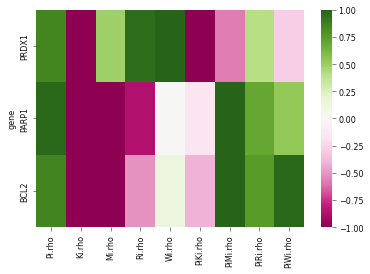

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = stats.zscore(
    Ci_df.filter(regex='rho$', axis=1),axis=1,ddof=1
)

sns.heatmap(
    df.loc[['PRDX1','PARP1','BCL2',],:], 
#     annot=True,
    vmin=-1, vmax=1,
    cmap="PiYG"
)

plt.show()

In [13]:
sns.heatmap

<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

# Pathway analysis

In [14]:
from iPAGE2 import ipage2